In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv(
    "E:\\Statistics\\Capstone\\Capstone_data_modification\\lalit_data.csv")

In [4]:
data.head()

,Sales,Account_usage_data,Customer_segment,Misaligned_incentives,Employee_performance,Customer_feedback,points_of_improvement,compliance,retail_acc_setup_errrate,avg_time_to_close_issues,...,Target,balance,income_levels,tenure_with_bank,credit_score,age,prod_id,prod_sell_count,prod_sell_perf,prod_price
0,624,1,3,1,3,1,6,3,17,19,...,0,8405804,3018313,18,853,33,2,0,0,6291
1,986,0,1,3,3,2,6,4,27,27,...,1,1564405,728580,15,815,31,7,0,1,248000
2,361,0,3,5,2,1,7,2,5,38,...,0,2295104,2786608,6,668,48,6,0,0,189022
3,575,1,2,5,3,7,8,3,28,27,...,0,5237699,3587506,15,459,60,4,0,1,21825
4,516,1,4,1,3,5,4,1,15,18,...,1,8302403,3036293,18,754,38,4,1,0,21825


In [5]:
df = data.copy()
df.head()

,Sales,Account_usage_data,Customer_segment,Misaligned_incentives,Employee_performance,Customer_feedback,points_of_improvement,compliance,retail_acc_setup_errrate,avg_time_to_close_issues,...,Target,balance,income_levels,tenure_with_bank,credit_score,age,prod_id,prod_sell_count,prod_sell_perf,prod_price
0,624,1,3,1,3,1,6,3,17,19,...,0,8405804,3018313,18,853,33,2,0,0,6291
1,986,0,1,3,3,2,6,4,27,27,...,1,1564405,728580,15,815,31,7,0,1,248000
2,361,0,3,5,2,1,7,2,5,38,...,0,2295104,2786608,6,668,48,6,0,0,189022
3,575,1,2,5,3,7,8,3,28,27,...,0,5237699,3587506,15,459,60,4,0,1,21825
4,516,1,4,1,3,5,4,1,15,18,...,1,8302403,3036293,18,754,38,4,1,0,21825


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Sales                     1000 non-null   int64
 1   Account_usage_data        1000 non-null   int64
 2   Customer_segment          1000 non-null   int64
 3   Misaligned_incentives     1000 non-null   int64
 4   Employee_performance      1000 non-null   int64
 5   Customer_feedback         1000 non-null   int64
 6   points_of_improvement     1000 non-null   int64
 7   compliance                1000 non-null   int64
 8   retail_acc_setup_errrate  1000 non-null   int64
 9   avg_time_to_close_issues  1000 non-null   int64
 10  Emp_ID                    1000 non-null   int64
 11  Target                    1000 non-null   int64
 12  balance                   1000 non-null   int64
 13  income_levels             1000 non-null   int64
 14  tenure_with_bank          1000 non-null  

In [7]:
df['Customer_segment'].value_counts()

1    359
3    250
2    222
4    149
5     20
Name: Customer_segment, dtype: int64

In [8]:
#Deriving Customer Segments based on factors: balance, income_levels, tenure_with_bank, credit_score, age
for i,j in df.iterrows():
  if (j['balance'] <= 1000000) | (j['income_levels'] <= 800000) | (j['tenure_with_bank'] <=5) & (j['credit_score']<= 500) | (j['age'] <= 27):
    j['Customer_segment'] = 1
  elif (1000000 > j['balance']<= 2000000) | (800000 > j['income_levels'] <= 1200000) |(5 > j['tenure_with_bank'] <=10) | (500 > j['credit_score'] <= 600) | ( 27> j['age'] <= 35) :
    j['Customer_segment'] = 2
  elif (2000000 > j['balance']<= 4000000) | (1200000 > j['income_levels'] <= 2000000) |(10 > j['tenure_with_bank'] <=20) | (600 > j['credit_score'] <= 750) | ( 35> j['age'] <= 45) :
    j['Customer_segment'] = 3 
  elif (4000000 > j['balance']<= 6000000) | (2000000 > j['income_levels'] <= 3000000) |(20 > j['tenure_with_bank'] <=30) | (750 > j['credit_score']<= 820) | ( 45> j['age'] <= 55) :
    j['Customer_segment'] = 4
  elif  (j['balance']> 6000000) | ( j['income_levels'] > 3000000 ) |(j['tenure_with_bank']> 30  ) | (j['credit_score']> 820) | ( j['age']>55 ) :
    j['Customer_segment'] = 5

In [9]:
df['Customer_segment'].value_counts()

1    359
3    250
2    222
4    149
5     20
Name: Customer_segment, dtype: int64

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Customer Segment Count')

Text(0.5, 0, 'Customer Segment')

Text(0, 0.5, 'Count')

Text(0.0, 359.1, '359')

Text(1.0, 222.1, '222')

Text(2.0, 250.1, '250')

Text(3.0, 149.1, '149')

Text(4.0, 20.1, '20')

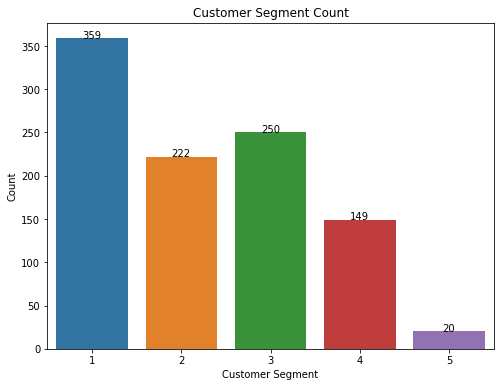

In [10]:
labels = df['Customer_segment'].value_counts().index.sort_values()
values = [len(df[df['Customer_segment']==1]), len(df[df['Customer_segment']==2]),len(df[df['Customer_segment']==3]),len(df[df['Customer_segment']==4]),
          len(df[df['Customer_segment']==5])]
plt.figure(figsize = (8,6))
plt.title('Customer Segment Count')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
ax = sns.barplot(x =labels, y = values)
for i,p in enumerate(ax.patches):
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height +0.1, values[i], ha = "center")
plt.savefig('Cust_Seg_count')

In [11]:

#Deriving Employee performance based on factors: points_of_improvement, retail_acc_setup_errrate, avg_time_to_close_issues and compliance

for m,n in df.iterrows():
  if ((n['points_of_improvement'] == 10) & (26 > n['retail_acc_setup_errrate'] <= 30)) & (65 > n['avg_time_to_close_issues'] <=72) & (n['compliance'] ==1):
    n['Employee_performance']  = 1
  elif ((8>= n['points_of_improvement'] <= 10) & (19 > n['retail_acc_setup_errrate'] <= 26)) & (55 > n['avg_time_to_close_issues'] <=65) & (n['compliance'] ==2):
    n['Employee_performance']  = 2
  elif ((6 >= n['points_of_improvement'] <= 7) | (16 >= n['retail_acc_setup_errrate'] <= 19)) | (45 > n['avg_time_to_close_issues'] <=55) | (n['compliance'] ==3):
    n['Employee_performance']  = 3
  elif ((4 >= n['points_of_improvement'] <= 5) | (10 > n['retail_acc_setup_errrate'] <= 15)) | (30 > n['avg_time_to_close_issues'] <=45) | (n['compliance'] ==4):
    n['Employee_performance']  = 4
  elif  (( n['points_of_improvement'] <=3 ) | (2>= n['retail_acc_setup_errrate'] <= 10)) | ( n['avg_time_to_close_issues'] <=30) | (n['compliance'] ==5):
    n['Employee_performance']  = 5 


In [12]:
df['Employee_performance'].value_counts() 

3    843
2     79
5     31
1     24
4     23
Name: Employee_performance, dtype: int64

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Employee performance Count')

Text(0.5, 0, 'Employee Performance')

Text(0, 0.5, 'Count')

Text(0.0, 24.1, '24')

Text(1.0, 79.1, '79')

Text(2.0, 843.1, '843')

Text(3.0, 23.1, '23')

Text(4.0, 31.1, '31')

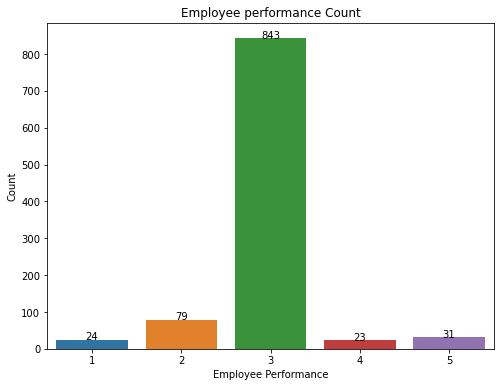

In [13]:
labels = df['Employee_performance'].value_counts().index.sort_values()
values = [len(df[df['Employee_performance']==1]), len(df[df['Employee_performance']==2]),len(df[df['Employee_performance']==3]),len(df[df['Employee_performance']==4]),
          len(df[df['Employee_performance']==5])]
plt.figure(figsize = (8,6))
plt.title('Employee performance Count')
plt.xlabel('Employee Performance')
plt.ylabel('Count')
ax = sns.barplot(x =labels, y = values)
for i,p in enumerate(ax.patches):
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height +0.1, values[i], ha = "center")
plt.savefig('Emp_Perf_count')

In [14]:
#Deriving Product performance based on factors: prod_price, customer_segment, prod_sell_count, prod_sell_perf
df['Product_performance'] = 0
for a,b in df.iterrows():
  if (b['prod_price'] <= 60000) & (b['Customer_segment'] <= 3) & (b['prod_sell_count'] <= 1) & (b['prod_sell_perf']<= 1) :
     b['Product_performance'] = 1
  elif (b['prod_price'] > 60000) & (b['Customer_segment'] >= 4) & (b['prod_sell_count'] <= 1) & (b['prod_sell_perf']<= 1) :
     b['Product_performance'] = 1
  else:
      b['Product_performance'] = 0


In [15]:
df['Product_performance'].value_counts()

1    625
0    375
Name: Product_performance, dtype: int64

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Product Performance Count')

Text(0.5, 0, 'Product Performance')

Text(0, 0.5, 'Count')

Text(0.0, 375.1, '375')

Text(1.0, 625.1, '625')

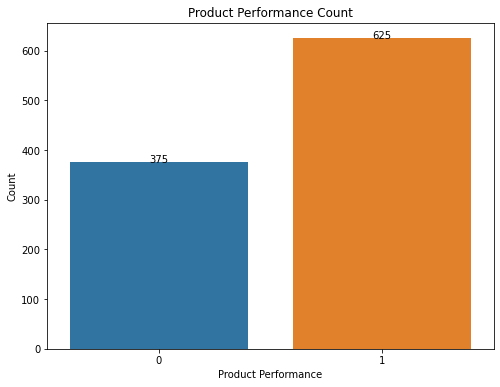

In [16]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Product_performance", data=df)
plt.title('Product Performance Count')
plt.xlabel('Product Performance')
plt.ylabel('Count')
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['Product_performance'].value_counts()[i],ha="center")
    i += 1

In [17]:
df.Account_usage_data.value_counts()

0    513
1    487
Name: Account_usage_data, dtype: int64

In [18]:
df.Misaligned_incentives.value_counts()

1    214
2    211
4    208
5    192
3    175
Name: Misaligned_incentives, dtype: int64

In [19]:
df.Customer_feedback.value_counts()

5     112
9     112
7     104
10    104
1     103
6      99
8      97
2      93
4      92
3      84
Name: Customer_feedback, dtype: int64

In [20]:
# 1 indicates employees involved in suspicious activities and 0 indicating otherwise
df.Target.value_counts()

0    742
1    258
Name: Target, dtype: int64

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Target')

Text(0, 0.5, 'Count')

Text(0.0, 742.1, '742')

Text(1.0, 258.1, '258')

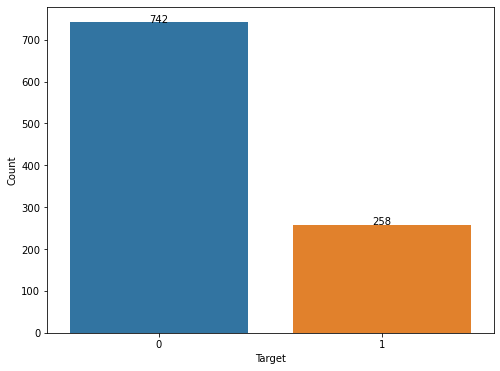

In [21]:
#Plot between risk violations(1) and non-violations(0)
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Target", data=df)
plt.xlabel('Target')
plt.ylabel('Count')
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['Target'].value_counts()[i],ha="center")
    i += 1

In [22]:
count_illegal = len(df[df['Target']==1])
count_normal = len(df[df['Target']==0])
pct_of_illegal = (count_illegal/(count_normal + count_illegal))*100
pct_of_normal = (count_normal/(count_normal + count_illegal))*100
print("Percentage of employees following conduct risk policies properly:",pct_of_normal)
print("Percentage of employees involved in suspicious activities thus violating conduct risk:",pct_of_illegal)

Percentage of employees following conduct risk policies properly: 74.2
Percentage of employees involved in suspicious activities thus violating conduct risk: 25.8


# Bi-Varient Analysis

<AxesSubplot:xlabel='Misaligned_incentives'>

Text(0.5, 1.0, 'Misaligned Incentives w.r.t Conduct Risk Violations plot')

Text(0.5, 0, 'Misaligned Incentives')

Text(0, 0.5, 'Conduct Risk Violations')

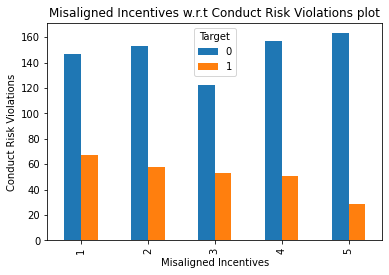

In [23]:
# Misaligned Incentives w.r.t Conduct Risk Violations 
#risk violations(1) and non-violations(0)
%matplotlib inline
pd.crosstab(df.Misaligned_incentives,df.Target).plot(kind='bar')
plt.title('Misaligned Incentives w.r.t Conduct Risk Violations plot')
plt.xlabel('Misaligned Incentives')
plt.ylabel('Conduct Risk Violations')
plt.savefig('RV_MI')

<AxesSubplot:xlabel='Customer_segment'>

Text(0.5, 0, 'Misaligned_incentives - Customer Segment')

Text(0, 0.5, 'Conduct Risk Violations')

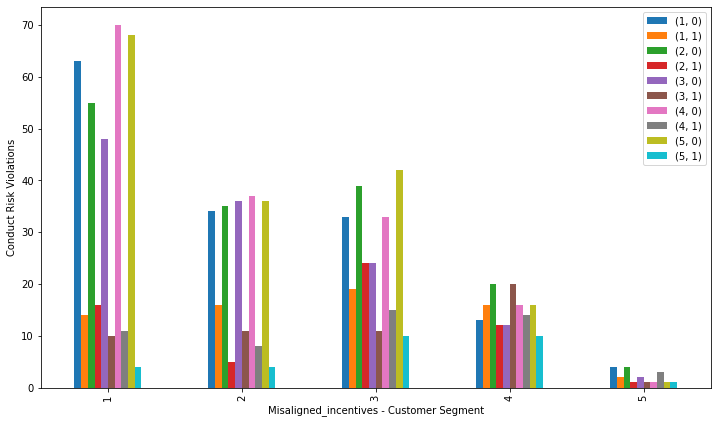

In [24]:
# Misaligned_incentives - Customer Segment
#risk violations(1) and non-violations(0)
pd.crosstab(df.Customer_segment,[df.Misaligned_incentives,df.Target],rownames=['Customer_segment'],colnames=['Misaligned_incentives','Target']).plot(kind='bar',figsize=(12,7))
plt.xlabel("Misaligned_incentives - Customer Segment") 
plt.ylabel("Conduct Risk Violations")
plt.legend(loc='best')
plt.savefig('MI_CS')
plt.show() 

<AxesSubplot:xlabel='Account_usage_data'>

Text(0.5, 1.0, 'Account Usage Data vs Conduct Risk Violations plot')

Text(0.5, 0, 'Account Usage Data')

Text(0, 0.5, 'Conduct Risk Violations')

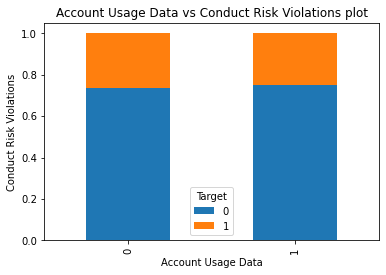

In [25]:
# Account Usage Data vs Conduct Risk Violations plot
#risk violations(1) and non-violations(0)
tab = pd.crosstab(df.Account_usage_data,df.Target)
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Account Usage Data vs Conduct Risk Violations plot')
plt.xlabel('Account Usage Data')
plt.ylabel('Conduct Risk Violations')
plt.savefig('AUD_RV')

In [26]:
tab.div(tab.sum(1).astype(float), axis=0)

Target,0,1
Account_usage_data,,
0,0.734893,0.265107
1,0.749487,0.250513


<AxesSubplot:xlabel='Employee_performance'>

Text(0.5, 1.0, 'Employee Performance Level - Conduct Risk Violations plot')

Text(0.5, 0, 'Employee Performance Level')

Text(0, 0.5, 'Conduct Risk Violations')

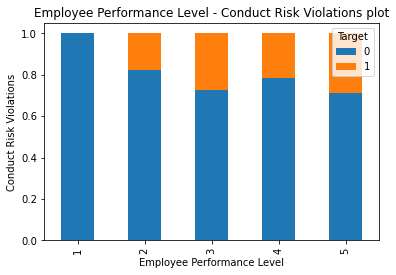

In [27]:
#Employee Performance Level - Conduct Risk Violations plot
#risk violations(1) and non-violations(0)
tab1 = pd.crosstab(df.Employee_performance,df.Target)
tab1.div(tab1.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Employee Performance Level - Conduct Risk Violations plot')
plt.xlabel('Employee Performance Level')
plt.ylabel('Conduct Risk Violations')
plt.savefig('EP_RV')

<AxesSubplot:xlabel='Customer_feedback'>

Text(0.5, 1.0, 'Customer Feedback against Conduct Risk Violations plot')

Text(0.5, 0, 'Customer Feedback')

Text(0, 0.5, 'Conduct Risk Violations')

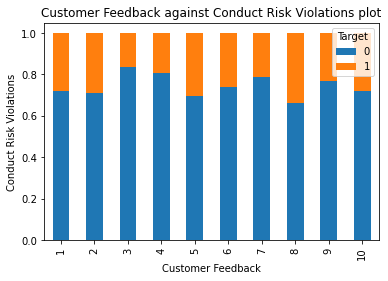

In [28]:
# Customer Feedback against Conduct Risk Violations plot
#risk violations(1) and non-violations(0)
tab2 = pd.crosstab(df.Customer_feedback,df.Target)
tab2.div(tab2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Customer Feedback against Conduct Risk Violations plot')
plt.xlabel('Customer Feedback')
plt.ylabel('Conduct Risk Violations')
plt.savefig('CF_RV')

<AxesSubplot:xlabel='retail_acc_setup_errrate'>

Text(0.5, 1.0, 'Retail Account Setup Error Rate against Conduct Risk Violations plot')

Text(0.5, 0, 'Retail Account Setup Error Rate')

Text(0, 0.5, 'Conduct Risk Violations')

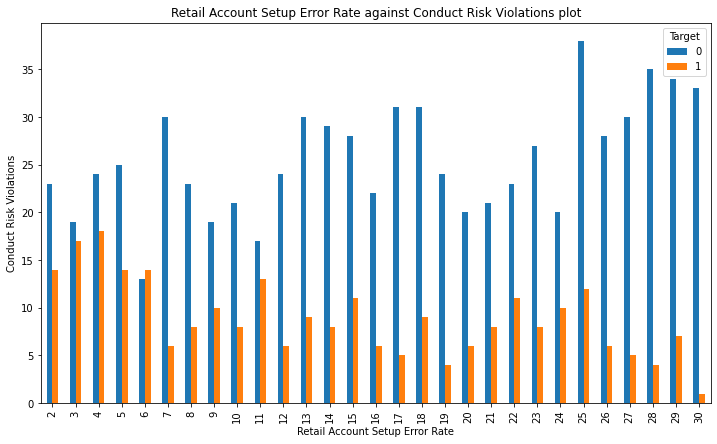

In [29]:
# Retail Account Setup Error Rate against Conduct Risk Violations plot
#risk violations(1) and non-violations(0)
pd.crosstab(df.retail_acc_setup_errrate,df.Target).plot(kind='bar',figsize=(12,7))
plt.title('Retail Account Setup Error Rate against Conduct Risk Violations plot')
plt.xlabel('Retail Account Setup Error Rate')
plt.ylabel('Conduct Risk Violations')
plt.savefig('RASER_RV')

<AxesSubplot:xlabel='avg_time_to_close_issues'>

Text(0.5, 1.0, 'Average time to close issues against Conduct Risk Violations plot')

Text(0.5, 0, 'Average time to close issues')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(0, 0, '8'),
  Text(1, 0, '9'),
  Text(2, 0, '10'),
  Text(3, 0, '11'),
  Text(4, 0, '12'),
  Text(5, 0, '13'),
  Text(6, 0, '14'),
  Text(7, 0, '15'),
  Text(8, 0, '16'),
  Text(9, 0, '17'),
  Text(10, 0, '18'),
  Text(11, 0, '19'),
  Text(12, 0, '20'),
  Text(13, 0, '21'),
  Text(14, 0, '22'),
  Text(15, 0, '23'),
  Text(16, 0, '24'),
  Text(17, 0, '25'),
  Text(18, 0, '26'),
  Text(19, 0, '27'),
  Text(20, 0, '28'),
  Text(21, 0, '29'),
  Text(22, 0, '30'),
  Text(23, 0, '31'),
  Text(24, 0, '32'),
  Text(25, 0, '33'),
  Text(26, 0, '34'),
  Text(27, 0, '35'),
  Text(28, 0, '36'),
  Text(29, 0, '37'),
  Text(30, 0, '38'),
  Text(31, 0, '39'),
  Text(32, 0, '40'),
  Text(33, 0, '41'),
  Te

Text(0, 0.5, 'Conduct Risk Violations')

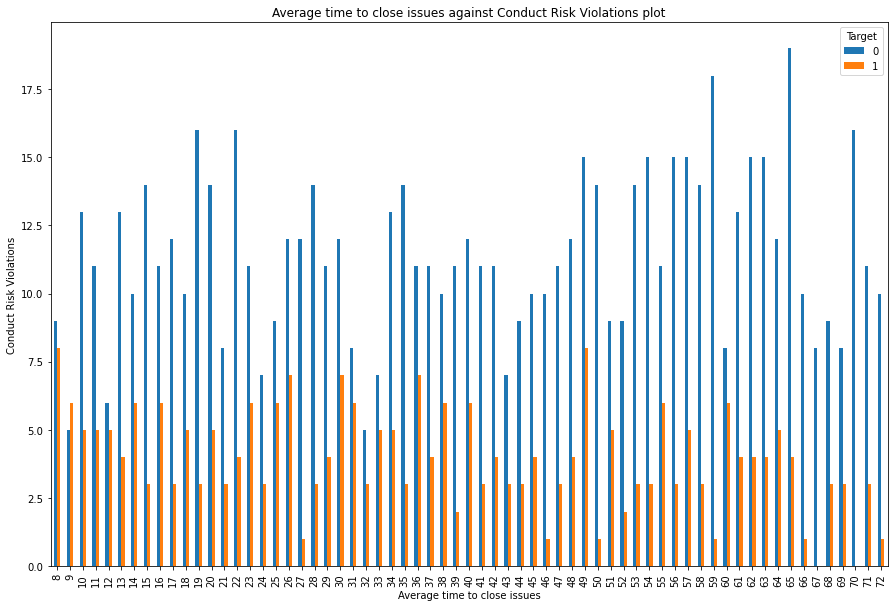

In [30]:
# Average time to close issues against Conduct Risk Violations plot
#risk violations(1) and non-violations(0)
pd.crosstab(df.avg_time_to_close_issues,df.Target).plot(kind='bar',figsize=(15,10))
plt.title('Average time to close issues against Conduct Risk Violations plot')
plt.xlabel('Average time to close issues')
plt.xticks(rotation=90)
plt.ylabel('Conduct Risk Violations')
plt.savefig('ATCI_RV')

<AxesSubplot:xlabel='compliance'>

Text(0.5, 1.0, 'Compliance against Conduct Risk Violations plot')

Text(0.5, 0, 'Compliance')

Text(0, 0.5, 'Conduct Risk Violations')

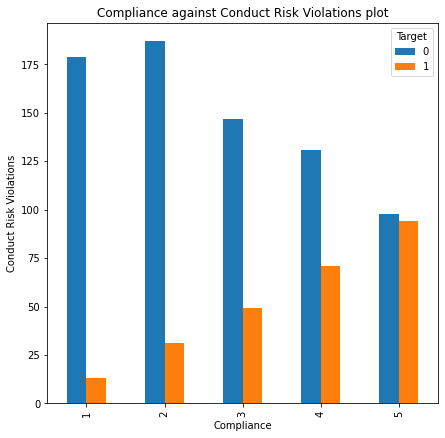

In [31]:
# Compliance against Conduct Risk Violations plot
#risk violations(1) and non-violations(0)
#compliance  
#1-least compliant to companies policies/work guidelines 
#5-highly compliant 
pd.crosstab(df.compliance,df.Target).plot(kind='bar',figsize=(7,7))
plt.title('Compliance against Conduct Risk Violations plot')
plt.xlabel('Compliance')
plt.ylabel('Conduct Risk Violations')
plt.savefig('C_RV')

<AxesSubplot:xlabel='Product_performance'>

Text(0.5, 1.0, 'Product Performance against Conduct Risk Violations plot')

Text(0.5, 0, 'Product Performance')

Text(0, 0.5, 'Conduct Risk Violations')

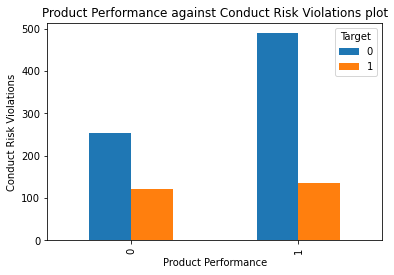

In [32]:
# Product Performance against Conduct Risk Violations plot
#risk violations(1) and non-violations(0)
#Product_performance: 1-performing well, 0-not performing well
pd.crosstab(df.Product_performance,df.Target).plot(kind='bar',figsize=(6,4))
plt.title('Product Performance against Conduct Risk Violations plot')
plt.xlabel('Product Performance')
plt.ylabel('Conduct Risk Violations')
plt.savefig('PP_RV')

In [33]:
# Logistic Regression
df2 = df.copy()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df2.drop(['Emp_ID','Target','balance','income_levels','tenure_with_bank','credit_score','age','prod_id','prod_price','prod_sell_count','prod_sell_perf'],axis=1)
y = df2['Target']

In [34]:
df3 = df.copy()

In [35]:
df_yes = df3[df3['Target']==1]
df_no = df3[df3['Target']==0]

In [36]:
df_yes.Target.value_counts()
df_no.Target.value_counts()

1    258
Name: Target, dtype: int64

0    742
Name: Target, dtype: int64

In [37]:
df_yes_x = df_yes.drop(['Emp_ID','Target','balance','income_levels','tenure_with_bank','credit_score','age','prod_id','prod_price','prod_sell_count','prod_sell_perf'],axis=1)
df_yes_y = df_yes['Target']

df_no_x = df_no.drop(['Emp_ID','Target','balance','income_levels','tenure_with_bank','credit_score','age','prod_id','prod_price','prod_sell_count','prod_sell_perf'],axis=1)
df_no_y = df_no['Target']

In [38]:
df_yes_x.columns

Index(['Sales', 'Account_usage_data', 'Customer_segment',
       'Misaligned_incentives', 'Employee_performance', 'Customer_feedback',
       'points_of_improvement', 'compliance', 'retail_acc_setup_errrate',
       'avg_time_to_close_issues', 'Product_performance'],
      dtype='object')

In [39]:
count_classes = pd.value_counts(df3['Target'], sort = True)

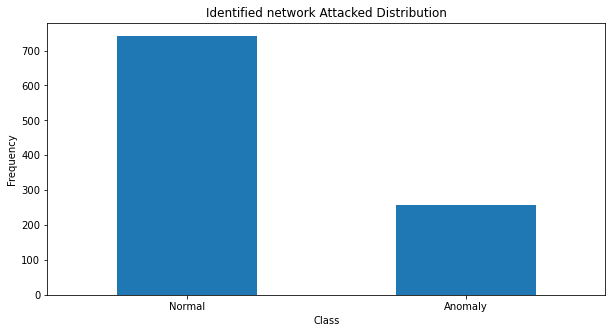

In [40]:
plt.figure(figsize=(10,5))
LABELS = ["Normal", "Anomaly"]
count_classes.plot(kind = 'bar', rot=0)
plt.title("Identified network Attacked Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [41]:
X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(df_yes_x,df_yes_y,test_size=0.40,random_state=0)

In [42]:
X_train_No, X_test_No, y_train_No, y_test_No = train_test_split(df_no_x,df_no_y,test_size=0.40,random_state=0)

In [43]:
X_train = pd.concat([X_train_yes,X_train_No])
X_test = pd.concat([X_test_yes,X_test_No])
y_train = pd.concat([y_train_yes,y_train_No])
y_test = pd.concat([y_test_yes,y_test_No])

In [44]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=0)
Logreg = LogisticRegression()
Logreg.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred_train = Logreg.predict(X_train)
y_pred_test = Logreg.predict(X_test)
print('Logistic Regression Accuracy on train set: {:.2f}'.format(Logreg.score(X_train,y_train)))
print('Logistic Regression Accuracy on test set: {:.2f}'.format(Logreg.score(X_test,y_test)))

Logistic Regression Accuracy on train set: 0.83
Logistic Regression Accuracy on test set: 0.80


<AxesSubplot:>

Text(33.0, 0.5, 'True class')

Text(0.5, 15.0, 'Predicted class')

Text(0.5, 1.0, 'Logistic Regression')

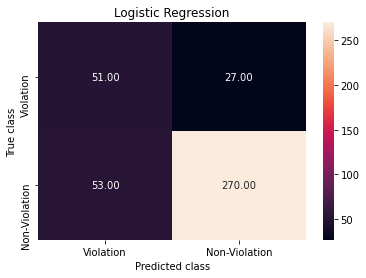

In [46]:
from sklearn.metrics import confusion_matrix
logistic_cm = metrics.confusion_matrix(y_pred_test, y_test, [1,0])
sns.heatmap(logistic_cm, annot=True, fmt='.2f',xticklabels = ["Violation", "Non-Violation"] , yticklabels = ["Violation", "Non-Violation"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('LR_CM')

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 Score: ",metrics.f1_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       297
           1       0.65      0.49      0.56       104

    accuracy                           0.80       401
   macro avg       0.74      0.70      0.72       401
weighted avg       0.79      0.80      0.79       401

Accuracy:  0.800498753117207
Precision: 0.6538461538461539
Recall: 0.49038461538461536
F1 Score:  0.5604395604395604


# K-Nearest Neighbors(KNN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

In [51]:
print('K Nearest Accuracy on train set: {:.2f}'.format(knn.score(X_train,y_train)))
print('K Nearest Accuracy on test set: {:.2f}'.format(knn.score(X_test,y_test)))

K Nearest Accuracy on train set: 0.80
K Nearest Accuracy on test set: 0.69


<AxesSubplot:>

Text(33.0, 0.5, 'True class')

Text(0.5, 15.0, 'Predicted class')

Text(0.5, 1.0, 'K-Nearest Neighbors')

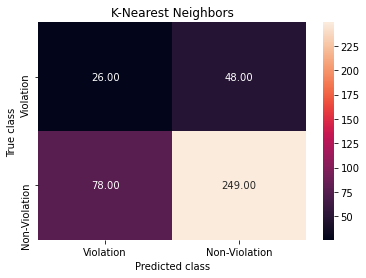

In [52]:
knn_cm = metrics.confusion_matrix(knn_pred_test, y_test, [1,0])
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Violation", "Non-Violation"] , yticklabels = ["Violation", "Non-Violation"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('K-Nearest Neighbors')
plt.savefig('KNN_CM')

In [53]:
print(classification_report(y_test, knn.predict(X_test)))
print("Accuracy: ",metrics.accuracy_score(y_test, knn.predict(X_test)))
print("Precision: ",metrics.precision_score(y_test, knn.predict(X_test)))
print("Recall: ",metrics.recall_score(y_test, knn.predict(X_test)))
print("F1 Score: ",metrics.f1_score(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       297
           1       0.35      0.25      0.29       104

    accuracy                           0.69       401
   macro avg       0.56      0.54      0.55       401
weighted avg       0.66      0.69      0.67       401

Accuracy:  0.685785536159601
Precision:  0.35135135135135137
Recall:  0.25
F1 Score:  0.2921348314606742


# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred_gnbtrain = gnb.predict(X_train)
y_pred_gnbtest = gnb.predict(X_test)

In [56]:
print('Gaussian Naive Bayes model Accuracy on train set: {:.3f}'.format(gnb.score(X_train, y_train)))
print('Gaussian Naive Bayes model Accuracy on test set: {:.3f}'.format(gnb.score(X_test,y_test)))

Gaussian Naive Bayes model Accuracy on train set: 0.825
Gaussian Naive Bayes model Accuracy on test set: 0.776


<AxesSubplot:>

Text(33.0, 0.5, 'True class')

Text(0.5, 15.0, 'Predicted class')

Text(0.5, 1.0, 'Naive Bayes')

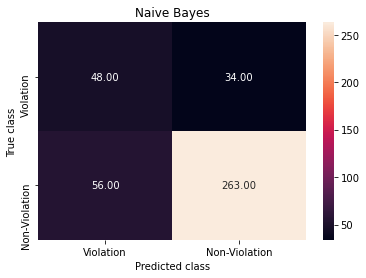

In [57]:
gnb_cm = metrics.confusion_matrix(y_pred_gnbtest, y_test, [1,0])
sns.heatmap(gnb_cm, annot=True, fmt='.2f',xticklabels = ["Violation", "Non-Violation"] , yticklabels = ["Violation", "Non-Violation"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Naive Bayes')
plt.savefig('NB_CM')

In [58]:
print(classification_report(y_test,y_pred_gnbtest))
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred_gnbtest))
print("Precision: ",metrics.precision_score(y_test,y_pred_gnbtest))
print("Recall: ",metrics.recall_score(y_test,y_pred_gnbtest))
print("F1 Score: ",metrics.f1_score(y_test, y_pred_gnbtest))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       297
           1       0.59      0.46      0.52       104

    accuracy                           0.78       401
   macro avg       0.70      0.67      0.69       401
weighted avg       0.76      0.78      0.77       401

Accuracy:  0.7755610972568578
Precision:  0.5853658536585366
Recall:  0.46153846153846156
F1 Score:  0.5161290322580645


In [59]:
# X_train = pd.concat([X_train_yes,X_train_No])
# X_test = pd.concat([X_test_yes,X_test_No])
# y_train = pd.concat([y_train_yes,y_train_No])
# y_test = pd.concat([y_test_yes,y_test_No])

In [60]:
# X_train.columns

In [61]:
# X_test.columns

In [62]:
# y_train.name

In [63]:
# df_mod = pd.concat([y_test_yes,X_test_yes], axis = 1)

In [64]:
# df_mod.columns

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
from sklearn.inspection import permutation_importance
rf.feature_importances_

array([0.14825822, 0.02247624, 0.12183377, 0.07596625, 0.01534215,
       0.07632092, 0.08598759, 0.14884146, 0.14927554, 0.13279457,
       0.0229033 ])

In [67]:
df_yes.columns

Index(['Sales', 'Account_usage_data', 'Customer_segment',
       'Misaligned_incentives', 'Employee_performance', 'Customer_feedback',
       'points_of_improvement', 'compliance', 'retail_acc_setup_errrate',
       'avg_time_to_close_issues', 'Emp_ID', 'Target', 'balance',
       'income_levels', 'tenure_with_bank', 'credit_score', 'age', 'prod_id',
       'prod_sell_count', 'prod_sell_perf', 'prod_price',
       'Product_performance'],
      dtype='object')

In [68]:
#plt.barh(df.columns, rf.feature_importances_)
for feature in zip(X_train.columns, rf.feature_importances_):
    print(feature)

('Sales', 0.14825822122063992)
('Account_usage_data', 0.022476235108994522)
('Customer_segment', 0.12183376721321912)
('Misaligned_incentives', 0.07596624987432522)
('Employee_performance', 0.015342145772232748)
('Customer_feedback', 0.07632092425871452)
('points_of_improvement', 0.08598758543545823)
('compliance', 0.14884145522111042)
('retail_acc_setup_errrate', 0.14927554081701816)
('avg_time_to_close_issues', 0.13279457060004232)
('Product_performance', 0.022903304478244853)


In [69]:
featureImp= []
for feat, importance in zip(X_train.columns, rf.feature_importances_):  
    temp = [feat, importance*100]
    featureImp.append(temp)

fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
print (fT_df.sort_values('Importance', ascending = True))

                     Feature  Importance
4       Employee_performance    1.534215
1         Account_usage_data    2.247624
10       Product_performance    2.290330
3      Misaligned_incentives    7.596625
5          Customer_feedback    7.632092
6      points_of_improvement    8.598759
2           Customer_segment   12.183377
9   avg_time_to_close_issues   13.279457
0                      Sales   14.825822
7                 compliance   14.884146
8   retail_acc_setup_errrate   14.927554


In [70]:
print("Accuracy of Random Forest Classifier on train set: {:.2f}".format(rf.score(X_train,y_train)))
print("Accuracy of random Forest Classifier on test set: {:.2f}".format(rf.score(X_test,y_test)))

Accuracy of Random Forest Classifier on train set: 1.00
Accuracy of random Forest Classifier on test set: 0.77


Since the accuracy on train set is much higher than test set in Random Forest method, this states the possibility of overfitting in this method. So, we are going to use Cross Validation to avoid over-fitting while still producing a prediction for each observation dataset.

# Cross Validation

In [71]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring_rf_tr = {'accuracy' : make_scorer(accuracy_score), 
                 'precision' : make_scorer(precision_score),
                 'recall' : make_scorer(recall_score), 
                 'f1_score' : make_scorer(f1_score)}

In [72]:
kfold_rf_tr = model_selection.KFold(n_splits=7,shuffle=True, random_state=7)
model_rf_tr = RandomForestClassifier(n_estimators=75) 

results_rf_tr = model_selection.cross_validate(estimator=model_rf_tr,
                                          X=X_train,
                                          y=y_train,
                                          cv=kfold_rf_tr,
                                          scoring=scoring_rf_tr)

In [73]:
y_pred_rftrain = model_selection.cross_val_predict(model_rf_tr, X_train, y_train, cv=kfold_rf_tr)
print("5-Fold cross validation average accuracy on train set: %.3f" %(np.mean(results_rf_tr['test_accuracy'])))

5-Fold cross validation average accuracy on train set: 0.806


In [74]:
# y_pred_rftrain = model_selection.cross_val_predict(model_rf_tr, X_train, y_train, cv=kfold_rf_tr)
# y_pred_proba_rftrain = model_selection.cross_val_predict(model_rf_tr, X_train, y_train, cv=kfold_rf_tr, method='predict_proba')
# print("5-Fold cross validation average accuracy on train set: %.3f" %(np.mean(results_rf_ts['train_accuracy'])))

In [75]:
# y_pred_rftrain

In [76]:
scoring_rf_ts = {'accuracy' : make_scorer(accuracy_score), 
                 'precision' : make_scorer(precision_score),
                 'recall' : make_scorer(recall_score), 
                 'f1_score' : make_scorer(f1_score)}

In [77]:
kfold_rf_ts = model_selection.KFold(n_splits=5,shuffle=True, random_state=10)
model_rf_ts = RandomForestClassifier(n_estimators=50) 

results_rf_ts = model_selection.cross_validate(estimator=model_rf_ts,
                                          X=X_test,
                                          y=y_test,
                                          cv=kfold_rf_ts,
                                          scoring=scoring_rf_ts)

In [78]:
y_pred_rftest = model_selection.cross_val_predict(model_rf_ts, X_test, y_test, cv=kfold_rf_ts)
y_pred_proba_rftest = model_selection.cross_val_predict(model_rf_ts, X_test, y_test, cv=kfold_rf_ts, method='predict_proba')
print("5-Fold cross validation average accuracy on test set: %.3f" %(np.mean(results_rf_ts['test_accuracy'])))

5-Fold cross validation average accuracy on test set: 0.766


In [79]:
# y_pred_rftest

<AxesSubplot:>

Text(33.0, 0.5, 'True class')

Text(0.5, 15.0, 'Predicted class')

Text(0.5, 1.0, 'Random Forest')

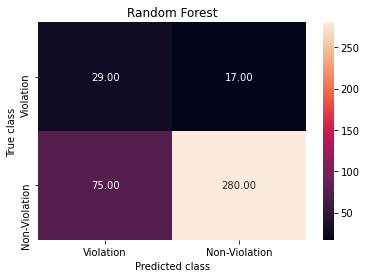

In [80]:
forest_cm = metrics.confusion_matrix(y_pred_rftest, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Violation", "Non-Violation"] , yticklabels = ["Violation", "Non-Violation"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('RF_CM')

In [81]:
print(classification_report(y_test,y_pred_rftest))
print("Accuracy: ",np.mean(results_rf_ts['test_accuracy']))
print("Precision: ",np.mean(results_rf_ts['test_precision']))
print("Recall: ",np.mean(results_rf_ts['test_recall']))
print("F1 Score: ",np.mean(results_rf_ts['test_f1_score']))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       297
           1       0.63      0.28      0.39       104

    accuracy                           0.77       401
   macro avg       0.71      0.61      0.62       401
weighted avg       0.75      0.77      0.74       401

Accuracy:  0.765679012345679
Precision:  0.5680652680652681
Recall:  0.30624317711274235
F1 Score:  0.38725490196078427


# Support Vector Machine

In [82]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
print("Accuracy of Support Vector Machine Classifier on train set: {:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy of Support Vector Machine Classifier on test set: {:.2f}".format(svc.score(X_test,y_test)))

SVC()

Accuracy of Support Vector Machine Classifier on train set: 0.74
Accuracy of Support Vector Machine Classifier on test set: 0.74


# Cross Validation

In [83]:
scoring_svm_tr = {'accuracy' : make_scorer(accuracy_score), 
                  'precision' : make_scorer(precision_score),
                  'recall' : make_scorer(recall_score), 
                  'f1_score' : make_scorer(f1_score)}

kfold_svm_tr = model_selection.KFold(n_splits=5,shuffle=True, random_state=7)
model_svm_tr = SVC() 

In [84]:
results_svm_tr = model_selection.cross_validate(estimator=model_svm_tr,
                                          X=X_train,
                                          y=y_train,
                                          cv=kfold_svm_tr,
                                          scoring=scoring_svm_tr)

y_pred_svtrain = model_selection.cross_val_predict(model_svm_tr, X_train, y_train, cv=kfold_svm_tr)
print("5-Fold cross validation average accuracy on train set: %.3f" %(np.mean(results_svm_tr['test_accuracy'])))

5-Fold cross validation average accuracy on train set: 0.743


In [85]:
scoring_svm_ts = {'accuracy' : make_scorer(accuracy_score), 
                  'precision' : make_scorer(precision_score),
                  'recall' : make_scorer(recall_score), 
                  'f1_score' : make_scorer(f1_score)}

kfold_svm_ts = model_selection.KFold(n_splits=5,shuffle=True,random_state=7)
model_svm_ts = SVC() 

In [86]:
results_svm_ts = model_selection.cross_validate(estimator=model_svm_ts,
                                          X=X_test,
                                          y=y_test,
                                          cv=kfold_svm_ts,
                                          scoring=scoring_svm_ts)

y_pred_svtest = model_selection.cross_val_predict(model_svm_ts, X_test, y_test, cv=kfold_svm_ts)
print("5-Fold cross validation average accuracy on test set: %.3f" %(np.mean(results_svm_ts['test_accuracy'])))

5-Fold cross validation average accuracy on test set: 0.741


<AxesSubplot:>

Text(33.0, 0.5, 'True class')

Text(0.5, 15.0, 'Predicted class')

Text(0.5, 1.0, 'Support Vector Machine')

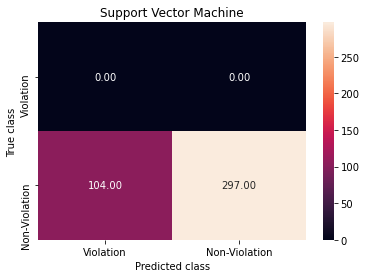

In [87]:
svm_cm = metrics.confusion_matrix(y_pred_svtest, y_test, [1,0])
sns.heatmap(svm_cm, annot=True, fmt='.2f',xticklabels = ["Violation", "Non-Violation"] , yticklabels = ["Violation", "Non-Violation"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')

In [88]:
print(classification_report(y_test,y_pred_svtest))
print("Accuracy: ",np.mean(results_svm_ts['test_accuracy']))
print("Precision: ",np.mean(results_svm_ts['test_precision']))
print("Recall: ",np.mean(results_svm_ts['test_recall']))
print("F1 Score: ",np.mean(results_svm_ts['test_f1_score']))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       297
           1       0.00      0.00      0.00       104

    accuracy                           0.74       401
   macro avg       0.37      0.50      0.43       401
weighted avg       0.55      0.74      0.63       401

Accuracy:  0.7405864197530865
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


# Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [90]:
print("Accuracy of Gradient Boosting Classifier on train set: {:.2f}".format(gb.score(X_train,y_train)))
print("Accuracy of Gradient Boosting Classifier on test set: {:.2f}".format(gb.score(X_test,y_test)))

Accuracy of Gradient Boosting Classifier on train set: 0.93
Accuracy of Gradient Boosting Classifier on test set: 0.78


# Cross Validation

In [91]:
scoring_gb_tr = {'accuracy' : make_scorer(accuracy_score), 
                 'precision' : make_scorer(precision_score),
                 'recall' : make_scorer(recall_score), 
                 'f1_score' : make_scorer(f1_score)}

kfold_gb_tr = model_selection.KFold(n_splits=5,shuffle=True,random_state=7)
model_gb_tr = GradientBoostingClassifier() 


In [92]:
results_gb_tr = model_selection.cross_validate(estimator=model_gb_tr,
                                          X=X_train,
                                          y=y_train,
                                          cv=kfold_gb_tr,
                                          scoring=scoring_gb_tr)

y_pred_gbtrain = model_selection.cross_val_predict(model_gb_tr, X_train, y_train, cv=kfold_gb_tr)
print("5-Fold cross validation average accuracy on train set: %.3f" %(np.mean(results_gb_tr['test_accuracy'])))

5-Fold cross validation average accuracy on train set: 0.813


In [93]:
scoring_gb_ts = {'accuracy' : make_scorer(accuracy_score), 
                 'precision' : make_scorer(precision_score),
                 'recall' : make_scorer(recall_score), 
                 'f1_score' : make_scorer(f1_score)}

kfold_gb_ts = model_selection.KFold(n_splits=5,shuffle=True,random_state=7)
model_gb_ts = GradientBoostingClassifier()  


In [94]:
results_gb_ts = model_selection.cross_validate(estimator=model_gb_ts,
                                          X=X_test,
                                          y=y_test,
                                          cv=kfold_gb_ts,
                                          scoring=scoring_gb_ts)

y_pred_gbtest = model_selection.cross_val_predict(model_gb_ts, X_test, y_test, cv=kfold_gb_ts)
y_pred_proba_gbtest = model_selection.cross_val_predict(model_gb_ts, X_test, y_test, cv=kfold_gb_ts, method='predict_proba')
print("5-Fold cross validation average accuracy on test set: %.3f" %(np.mean(results_gb_ts['test_accuracy'])))

5-Fold cross validation average accuracy on test set: 0.753


<AxesSubplot:>

Text(33.0, 0.5, 'True class')

Text(0.5, 15.0, 'Predicted class')

Text(0.5, 1.0, 'Gradient Boosting')

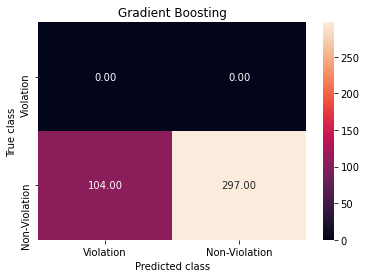

In [95]:
gb_cm = metrics.confusion_matrix(y_pred_gbtest, y_test, [1,0])
sns.heatmap(svm_cm, annot=True, fmt='.2f',xticklabels = ["Violation", "Non-Violation"] , yticklabels = ["Violation", "Non-Violation"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Gradient Boosting')
plt.savefig('GB_CM')

In [96]:
print(classification_report(y_test,y_pred_gbtest))
print("Accuracy: ",np.mean(results_gb_ts['test_accuracy']))
print("Precision: ",np.mean(results_gb_ts['test_precision']))
print("Recall: ",np.mean(results_gb_ts['test_recall']))
print("F1 Score: ",np.mean(results_gb_ts['test_f1_score']))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       297
           1       0.53      0.38      0.44       104

    accuracy                           0.75       401
   macro avg       0.67      0.63      0.64       401
weighted avg       0.73      0.75      0.74       401

Accuracy:  0.7530246913580247
Precision:  0.5308913308913309
Recall:  0.37594439481638303
F1 Score:  0.4356648377701009


<Figure size 576x432 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

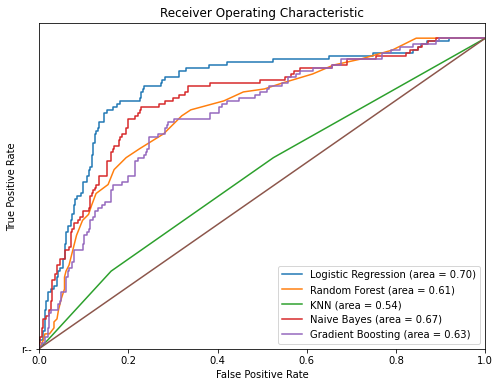

In [97]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Logitic regression
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr,tpr,thresholds = roc_curve(y_test, Logreg.predict_proba(X_test)[:,1])

#Random Forest
rf_roc_auc = roc_auc_score(y_test, y_pred_rftest)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_pred_proba_rftest[:,1])

#KNN
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

#GaussianNB
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])

#svc_roc_auc = roc_auc_score(y_test, svc.predict(X_test))
#svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])

#Gradient Boosting
gb_roc_auc = roc_auc_score(y_test,y_pred_gbtest)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, y_pred_proba_gbtest[:,1])

plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot(rf_fpr,rf_tpr,label='Random Forest (area = %0.2f)' %rf_roc_auc)
plt.plot(knn_fpr,knn_tpr,label='KNN (area = %0.2f)' %knn_roc_auc)
plt.plot(gnb_fpr,gnb_tpr,label='Naive Bayes (area = %0.2f)' %gnb_roc_auc)
#plt.plot(svc_fpr,svc_tpr,label='SVM (area = %0.2f)' %svc_roc_auc)
plt.plot(gb_fpr,gb_tpr,label='Gradient Boosting (area = %0.2f)' %gb_roc_auc)
plt.plot([0,1],[0,1],['r--'])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('ROC')
plt.show()

<Figure size 576x432 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

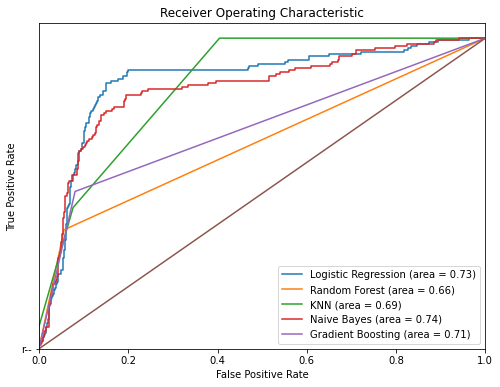

In [98]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, y_pred_train)
fpr,tpr,thresholds = roc_curve(y_train, Logreg.predict_proba(X_train)[:,1])

rf_roc_auc = roc_auc_score(y_train, y_pred_rftrain )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_train,y_pred_rftrain )

knn_roc_auc = roc_auc_score(y_train, knn.predict(X_train))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_train, knn.predict_proba(X_train)[:,1])

gnb_roc_auc = roc_auc_score(y_train, gnb.predict(X_train))
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_train, gnb.predict_proba(X_train)[:,1])

# svc_roc_auc = roc_auc_score(y_train, svc.predict(X_train))
# svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_train, svc.predict_proba(X_train)[:,1])

gb_roc_auc = roc_auc_score(y_train, y_pred_gbtrain)
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_train, y_pred_gbtrain)

plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot(rf_fpr,rf_tpr,label='Random Forest (area = %0.2f)' %rf_roc_auc)
plt.plot(knn_fpr,knn_tpr,label='KNN (area = %0.2f)' %knn_roc_auc)
plt.plot(gnb_fpr,gnb_tpr,label='Naive Bayes (area = %0.2f)' %gnb_roc_auc)
# plt.plot(svc_fpr,svc_tpr,label='SVM (area = %0.2f)' %svc_roc_auc)
plt.plot(gb_fpr,gb_tpr,label='Gradient Boosting (area = %0.2f)' %gb_roc_auc)
plt.plot([0,1],[0,1],['r--'])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('ROC')
plt.show()